In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as ptc 
import math
import random
from tensorflow.keras.utils import plot_model

from PIL import Image
import os



In this section you can experiment with whatever ConvNet architecture you'd like on CIFAR-10.

You should experiment with architectures, hyperparameters, loss functions, or anything else you can think of to train a model that achieves **at least 70%** accuracy on the **Test** set within 30 epochs.

In [3]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.cifar10.load_data()
x_train = x_train0.reshape(50000, 32, 32, 3).astype("float32") / 255.0
x_test = x_test0.reshape(10000, 32, 32, 3).astype("float32") / 255.0
y_train = np.asarray(y_train0, dtype=np.int32)
y_test = np.asarray(y_test0, dtype=np.int32)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


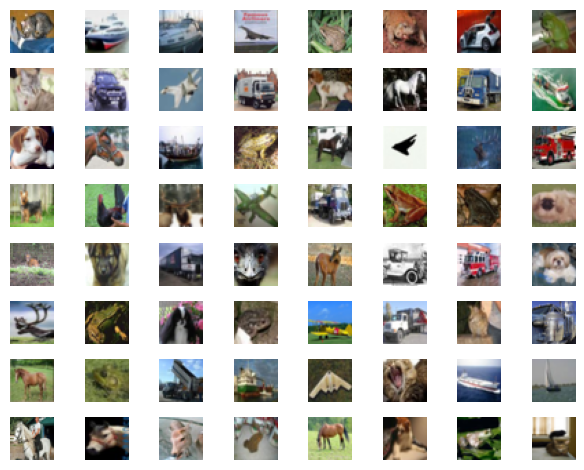

In [4]:
for i, img in enumerate(x_test0[0:64]):
    plt.subplot(8, 8, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    #prediction = model.predict(x_test[i:i+1])
    #pred_label = np.argmax(prediction)
    
   
    plt.tight_layout()

In [ ]:
def MyNet():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    # you can modify the optimizer as needed
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

  

In [13]:
model = MyNet()
training_history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.3614 - loss: 1.7544 - val_accuracy: 0.5178 - val_loss: 1.3483
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.4960 - loss: 1.4068 - val_accuracy: 0.5050 - val_loss: 1.4977
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5500 - loss: 1.2735 - val_accuracy: 0.5565 - val_loss: 1.2509
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5867 - loss: 1.1889 - val_accuracy: 0.6497 - val_loss: 0.9940
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.6081 - loss: 1.1227 - val_accuracy: 0.6383 - val_loss: 1.0170
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6285 - loss: 1.0686 - val_accuracy: 0.6155 - val_loss: 1.2112
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6450 - loss: 1.0211 - val_accuracy: 0.6803 - val_loss: 0.9814
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6567 -

In the cell below:  

1) Plot the network diagram
2) Write an explanation of what you did
3) Plot the loss and accuracy graph over epoches
4) Report accuracy on Test dataset. 

313/313 - 3s - 10ms/step - accuracy: 0.7493 - loss: 0.7732
Test Accuracy: 74.93%


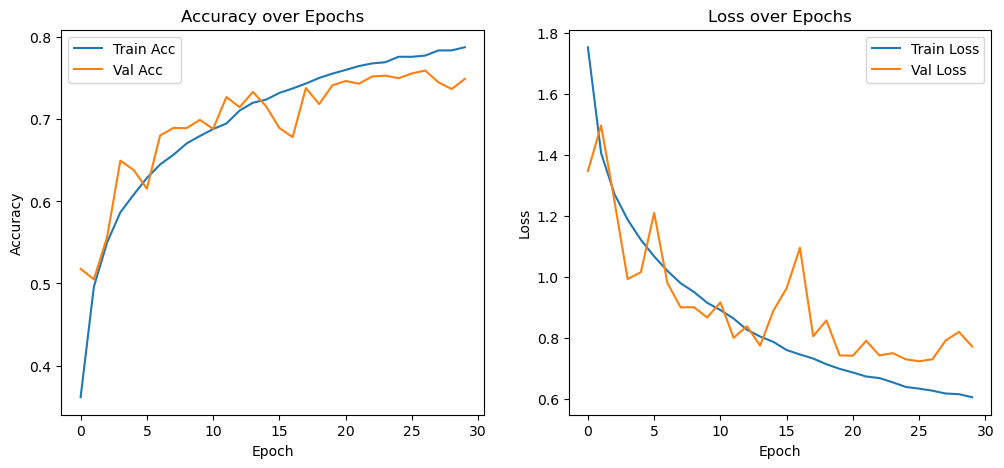

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(training_history.history['accuracy'], label='Train Acc')
plt.plot(training_history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# The Structure of my model is a a convoltuional layer with a three by three filter using ReLu, then a Max Pooling function that takes the 
# max value of 2x2 area and resizes the image, then I have a dropout that removes a random 30% of nuerons to stop overfitting, I decided to
# do these three things a second time for the nex set of layers, finally I flattened it into a vector, and used a dense layer to get it down
# to the 10 outputs needed.